In [94]:
import numpy as np
import matplotlib.pyplot as plt

#### set + initialize

In [215]:
# set
runtime = 10000.0 # years
valley_length = 5000.0 #
dx = 100.0  # m  (GT made this WAAAAY bigger for stability and debugging)
dt = 0.02 #year
rho_ice = 917 # kg/m3
A = 2.1*(10**-16)  # Arrhenius constant [Pa^-3 yr^-1]
N = 3 # shape factor from Glen's Flow Law
g = 9.81 # m/s2 gravitational acceleration
gamma = 0.01 # mass balance gradient [(m/yr)/m]
valley = 500 # elevation of valley floor (minimum elevation)
valley_max = 2500
ela = 1900 # Equilibrium line altitude
hor_dist = np.arange(0, valley_length + dx, dx) # x-array
slope= np.radians(20) # slope in degrees
#z_bedrock = valley + (valley_length - hor_dist) * np.tan(slope) # linear glacier bed
z_bedrock = valley_max*np.exp(-hor_dist/3000) # curved glacier bed

# define number of iterations
num_iterations = int(runtime / dt)

#initialize
H = np.zeros(len(hor_dist))# ice thickness array
b = np.zeros(len(hor_dist))# mass balance array

# GT setting this to copy z_bedrock initially
z_glacier = z_bedrock.copy() #valley+(2000-hor_dist)*np.tan(slope)# glacier surface elevation array

ice_slope = np.diff(z_glacier) # glacier surface slope array
H_edge = np.zeros(len(ice_slope)) # ice thickness edge array
#print('initial H_edge')
#print(H_edge)
# GT making this 1 element longer than elevation/thickness,
# so when it gets diff'd it will be exactly the right length
Q = np.zeros(len(z_bedrock) + 1)# ice discharge array

#### run model

In [216]:
for i in range(num_iterations):
    #print('Ice thickness:')
    #print(H)
    ice_slope = np.diff(z_glacier)/dx # calculate surface slope of ice
    
    # GT says: make it go from 0 to n-2
    H_edge[:] = H[:-1] # ice thickness - use H from upwind cell as H_edge
    #print('Ice thickness at edges:')
    #print(H_edge)
    tau = rho_ice * g * H_edge * (-ice_slope)
    #print('Ice stress:')
    #print(tau)
    #print('Ice stress to power:')
    #print(tau**N)
    #print('Ice slope:')
    #print(ice_slope)
    
    # GT says: note use of INNER dimensions for Q---we're leaving the boundary points at 0 flux
    Q[1:-1] = (A/5.0) * (tau**N) * (H_edge**2) # calcultate ice flux from on cell to the next (per year)
    #print('Ice discharge:')
    #print(Q)
    dQdx = np.diff(Q)/dx # calculate gradient of ice flux across cell boundaries
    #print('dQdx:')
    #print(dQdx)
    b = gamma * (z_glacier - ela) # ice loss and gain based on elevation dependent mass balance gradient
    
    # Here you want dHdt for each cell, and you have one b value per cell, so don't need 
    # to do just the "inner" b or just the "inner" H
    #dHdt = b[1:-1] - dQdx # rate of change of ice thickness
    dHdt = b - dQdx # rate of change of ice thickness
    #print('dHdt')
    #print(dHdt)    
    #H[1:-1] = H[1:-1] + (dHdt/dt) #update ice thickness with newly gained or lost ice
    
    # MULTIPLY by dt, don't divide
    H += dHdt * dt #update ice thickness with newly gained or lost ice
    
    H[H < 0] = 0 # prevent ice thickness from getting negative
    
    #print('Ice thickness:')
    #print(H)
    
    # same principle: can update all cells
    z_glacier[:] = H + z_bedrock # update ice elevation
    
    #print('Glacier altitude:')
    #print(z_glacier)

# plot

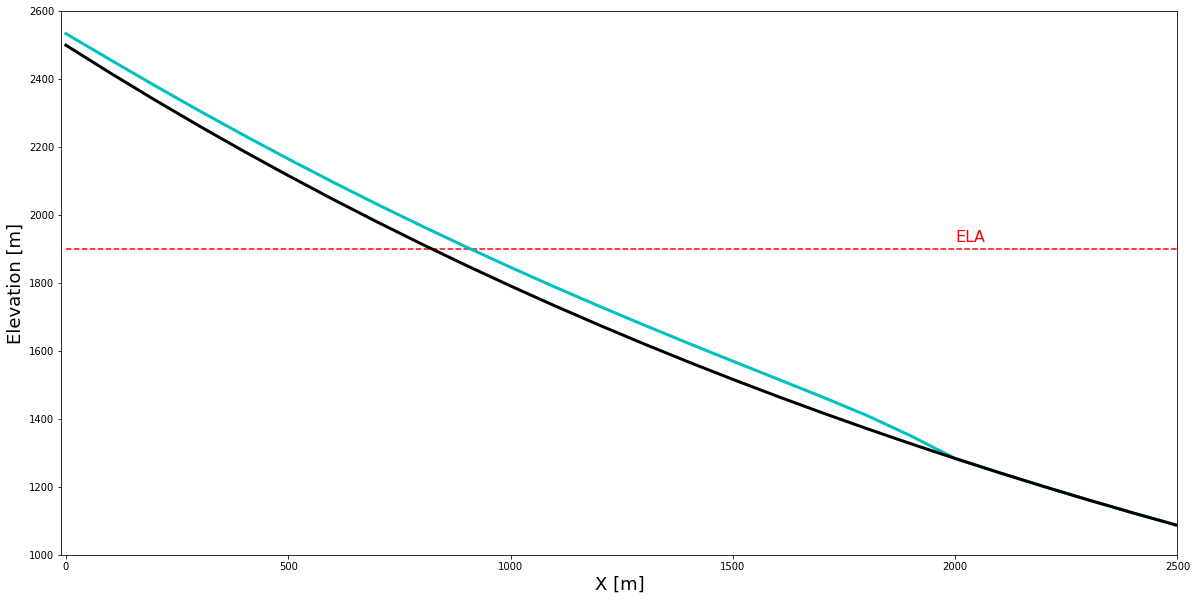

In [242]:
plt.figure(figsize=(20,10))
plt.plot(hor_dist, np.ones(len(hor_dist)) * ela, '--', color='red')
plt.plot(hor_dist, z_glacier, 'c',linewidth=3.0)
plt.plot(hor_dist, z_bedrock, 'k',linewidth=3.0)
plt.xlabel('X [m]',fontsize=18)
plt.ylabel('Elevation [m]',fontsize=18)
plt.xlim([-10,2500])
plt.ylim([1000,2600])
plt.text(2000,1920,'ELA',color='r',fontsize=16)
plt.show()

500000